<a href="https://colab.research.google.com/github/Chaittanyak/Deep-Learning-Projects-NkC/blob/main/Recognize_Face_and_Assigning_Emotion_tsub123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github//Chaittanyak/Deep-Learning-Projects-NkC/blob/main/Recognize_Face_and_Assigning_Emotion_tsub123_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Getting Requirements**

In [1]:
!pip install -q face_recognition
!pip install -q fer

     |████████████████████████████████| 100.1 MB 17 kB/s 
     |████████████████████████████████| 810 kB 5.3 MB/s 
     |████████████████████████████████| 2.3 MB 30.3 MB/s 


**Importing Required Libraries**

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition # https://pypi.org/project/face-recognition/
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

**Inputting with a Image with faces**

Masked or Low quality Images are not recommended for high accuracy


In [3]:
uploaded = files.upload()

Saving gettyimages-117058793-1024x1024.jpg to gettyimages-117058793-1024x1024.jpg


**The below code displays the uploaded Image**

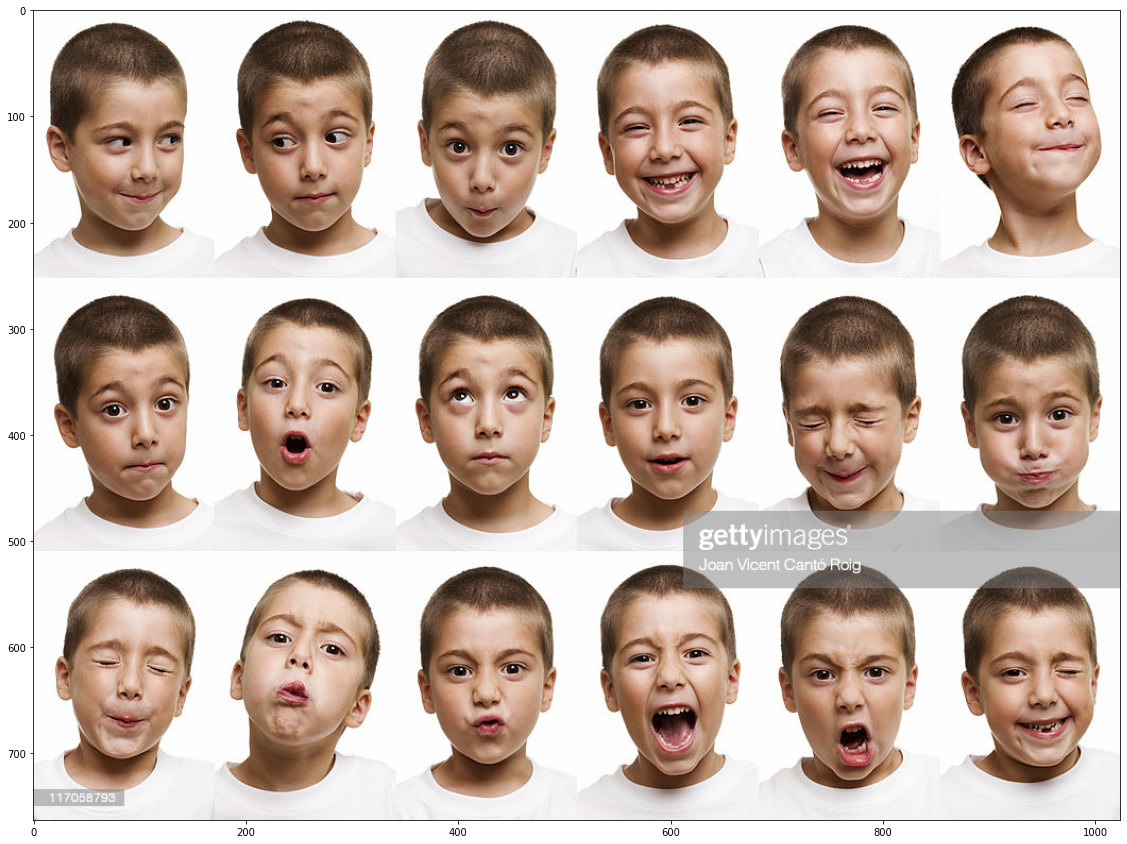

In [4]:
image = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)

```face_recognition``` handles major lifting here.(recognizes and draws a box around faces) 




Number of faces: 18
Time taken: 1.13  seconds


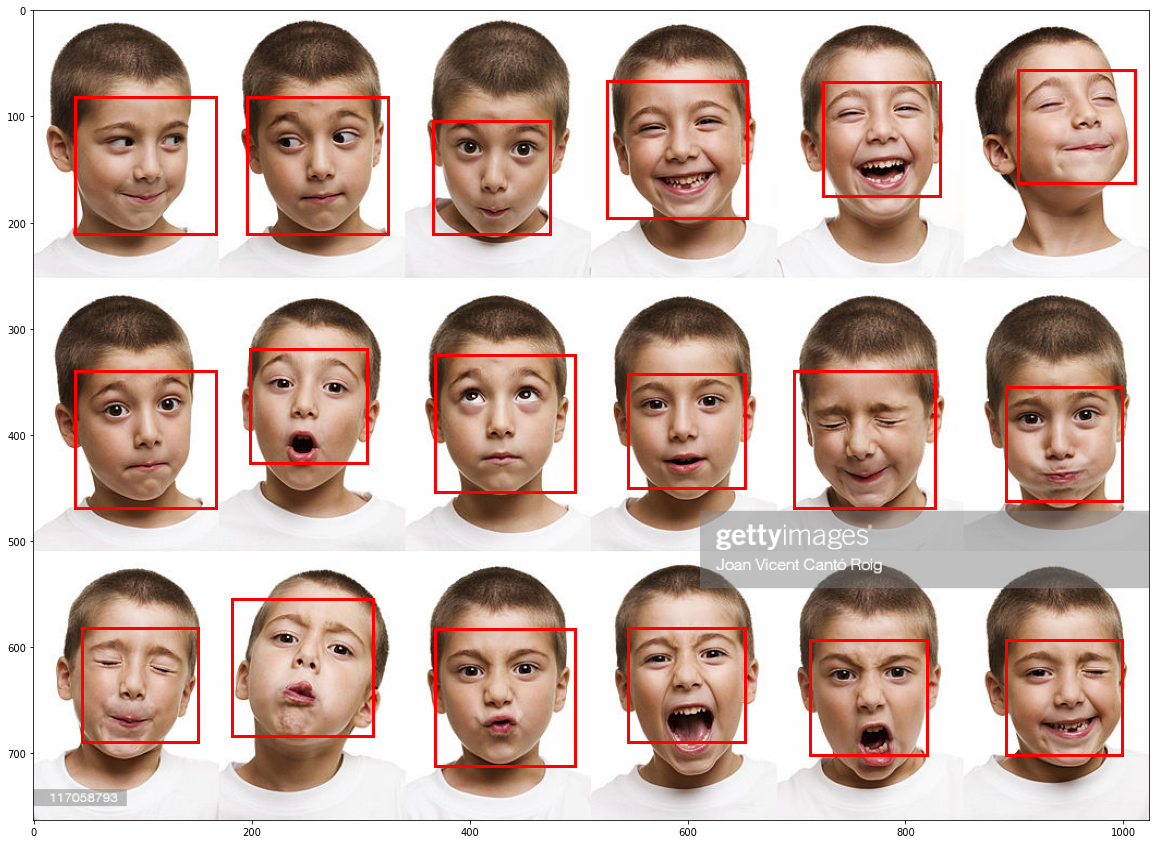

In [5]:
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none') #The rest of the code uses a for loop to iterate through the number of faces,
    ax.add_patch(rect) # and draw a box around the faces using these two lines:
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

The `detect_emotions` mostly works. Not all faces register an emotion in that cases it left empty

Number of faces: 18
Time taken: 30.87324619293213  seconds


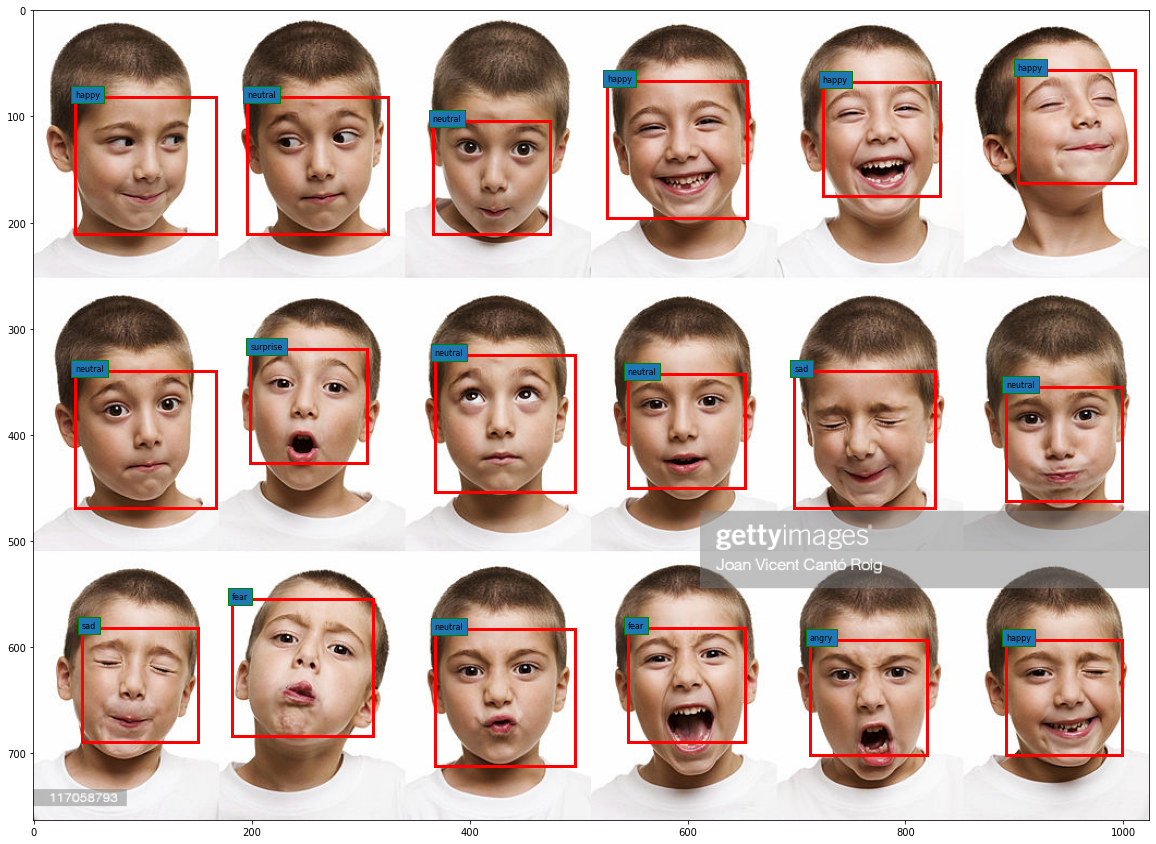

In [6]:
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='green', linewidth=1))
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",end-start," seconds")